In [39]:
#Importing dataset 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense , Conv2D, MaxPool2D , Flatten , Dropout

### Loading - "MNIST Data set"

## Containing Training samples = 60000 , testing samples= 10000

In [40]:
mnist = tf.keras.datasets.mnist

In [41]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [42]:
# Function to plot image
def plot_input_img(i):
    plt.imshow(X_train[i])
    plt.title(y_train[i])
    plt.show()
    plt.imshow(X_train[i], cmap = plt.cm.binary)
    plt.show()

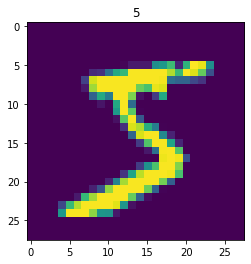

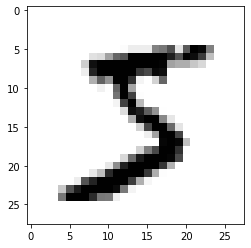

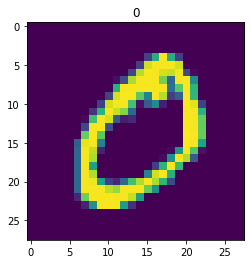

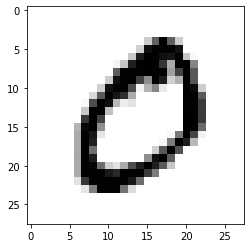

In [43]:
for i in range(2):
    plot_input_img(i)
    print(end=" ")

### Checking the Values of Each pixel

## Before Normalization

In [44]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [45]:
# Image PreProcessing
maxValue = np.amax(X_train)
print(maxValue)    

255


### As images are required in Gray level(1 channel==> 0)
# Normalizing the image to [0,1] range

In [46]:
X_train = X_train.astype(np.float32)/maxValue
X_test = X_test.astype(np.float32)/maxValue

# After Normalizing 

In [47]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

## Checking dimension of image

In [48]:
X_train.shape

(60000, 28, 28)

## Reshape / exapand the dimension of image to (28,28,1) 

# adding Unkown depth to make it 3D

In [49]:
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)

In [50]:
X_train.shape

(60000, 28, 28, 1)

## Converting Dependent variables to One-hot array

In [51]:
y_train[0]

5

In [52]:
y_train = keras.utils.np_utils.to_categorical(y_train)
y_test = keras.utils.np_utils.to_categorical(y_test)

In [53]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Creating a neural network 

In [54]:
model = Sequential()

# imput_Shape required to provide only once
# First Layer
model.add(Conv2D(32 , (3,3),input_shape = (28,28,1),activation = 'relu'))
model.add(MaxPool2D((2,2)))

#Second Layer
model.add(Conv2D(64 , (3,3),activation = 'relu'))
model.add(MaxPool2D((2,2)))

#Flattening to convert data into 1-Dimensional array for inputing next Layer
model.add(Flatten())

# Dropout is used to prevent overfitting on the training data
model.add(Dropout(0.5))

#Full Connection (convet Flatten input a vector)
model.add(Dense(10,activation = "softmax")) # Softmax converts a vector of numbers into a vector of probabilities

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

In [56]:
model.compile(optimizer = 'adam',loss = keras.losses.categorical_crossentropy,metrics=['accuracy'])


In [57]:
model.fit(X_train, y_train ,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 24s 18ms/step - loss: 0.2563 - accuracy: 0.9205 - val_loss: 0.0870 - val_accuracy: 0.9749
Epoch 2/5
1313/1313 [==============================] - 24s 19ms/step - loss: 0.0959 - accuracy: 0.9702 - val_loss: 0.0634 - val_accuracy: 0.9812
Epoch 3/5
1313/1313 [==============================] - 24s 18ms/step - loss: 0.0719 - accuracy: 0.9773 - val_loss: 0.0633 - val_accuracy: 0.9811
Epoch 4/5
1313/1313 [==============================] - 25s 19ms/step - loss: 0.0628 - accuracy: 0.9802 - val_loss: 0.0495 - val_accuracy: 0.9849
Epoch 5/5
1313/1313 [==============================] - 25s 19ms/step - loss: 0.0551 - accuracy: 0.9826 - val_loss: 0.0411 - val_accuracy: 0.9881


In [58]:
#Accuracy with trainig data
model.evaluate(X_train,y_train)

1875/1875 [==============================] - 10s 6ms/step - loss: 0.0306 - accuracy: 0.9910


[0.030561188235878944, 0.9910333156585693]

In [59]:
#Accuracy with testing data
model.evaluate(X_test,y_test)


313/313 [==============================] - 2s 5ms/step - loss: 0.0349 - accuracy: 0.9885


[0.034890368580818176, 0.9884999990463257]

In [60]:
model.save('DigitRecogModel.h5')

In [61]:
predictions = model.predict([X_test])

313/313 [==============================] - 2s 5ms/step


In [62]:
print(np.argmax(predictions[0]))

7


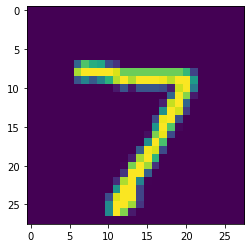

In [63]:
plt.imshow(X_test[0])

In [64]:
print(np.argmax(predictions[8]))

5


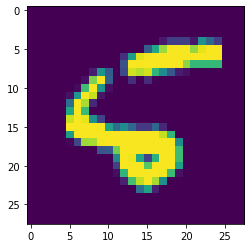

In [65]:
plt.imshow(X_test[8])

In [66]:
print(np.argmax(predictions[9]))

9


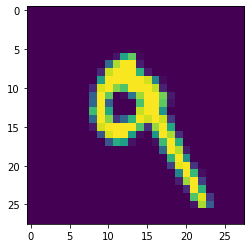

In [67]:
plt.imshow(X_test[7])